# ANALYSE EXPLORATOIRE , CLASSIFICATION ONLINE RETAIL - DONFACK PASCAL - M1-GI

In [4]:
# cd "C:\Users\donfa\OneDrive\Desktop\DEVOIR ML\ONLINE REATAIL"

C:\Users\donfa\OneDrive\Desktop\DEVOIR ML\ONLINE REATAIL


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Lecture du dataset
df = pd.read_excel('Online Retail.xlsx')

# PARTIE 1: EXPLORATION ET NETTOYAGE DES DONNÉES

In [6]:
# Affichage des informations de base du dataset
print("=== INFORMATIONS SUR LE DATASET ===")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\nTypes des colonnes:")
df.info()

=== INFORMATIONS SUR LE DATASET ===
Nombre de lignes : 541909
Nombre de colonnes : 8

Types des colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
print("\nStatistiques descriptives :")
df.describe()


Statistiques descriptives :


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Nettoyage des données

In [9]:
# =============================================================================
# Gestion des valeurs manquantes, incohérences et doublons
#=============================================================================

In [11]:
print("\nValeurs manquantes par colonne :")
df.isnull().sum()


Valeurs manquantes par colonne :


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Suppression des lignes sans CustomerID
df_clean = df.dropna()

In [14]:
# Suppression des lignes avec des quantités négatives ou prix unitaire nul
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

In [15]:
# forme du dataset apres nettoyage
print(f"Nombre de lignes après nettoyage : {df_clean.shape[0]}")
print(f"Nombre de colonnes après nettoyage : {df_clean.shape[1]}")
df_clean.info()

Nombre de lignes après nettoyage : 397884
Nombre de colonnes après nettoyage : 8
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


## Feature Engineering

In [17]:
# Calcul du montant total par transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [19]:
print("\n=== STATISTIQUES DESCRIPTIVES ===")
(df_clean.describe())


=== STATISTIQUES DESCRIPTIVES ===


,Quantity,InvoiceDate,UnitPrice,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000
std,179.331775,NaN,22.097877,309.071041


## Analyse des ventes par pays

In [21]:
country_sales = df_clean.groupby('Country')['TotalAmount'].agg(['sum', 'count']).sort_values('sum', ascending=False)
print("\n=== TOP 10 PAYS PAR VENTES ===")
country_sales.head(10)



=== TOP 10 PAYS PAR VENTES ===


,sum,count
Country,,
United Kingdom,7308391.554,354321
Netherlands,285446.340,2359
EIRE,265545.900,7236
Germany,228867.140,9040
France,209024.050,8341
Australia,138521.310,1182
Spain,61577.110,2484
Switzerland,56443.950,1841
Belgium,41196.340,2031


# Analyse RFM (Recency, Frequency, Monetary)


In [22]:
# Conversion de InvoiceDate en datetime si nécessaire
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Calcul de la date la plus récente
max_date = df_clean['InvoiceDate'].max()


In [23]:
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'   # Monetary
})

In [24]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# PARTIE 3: VISUALISATIONS

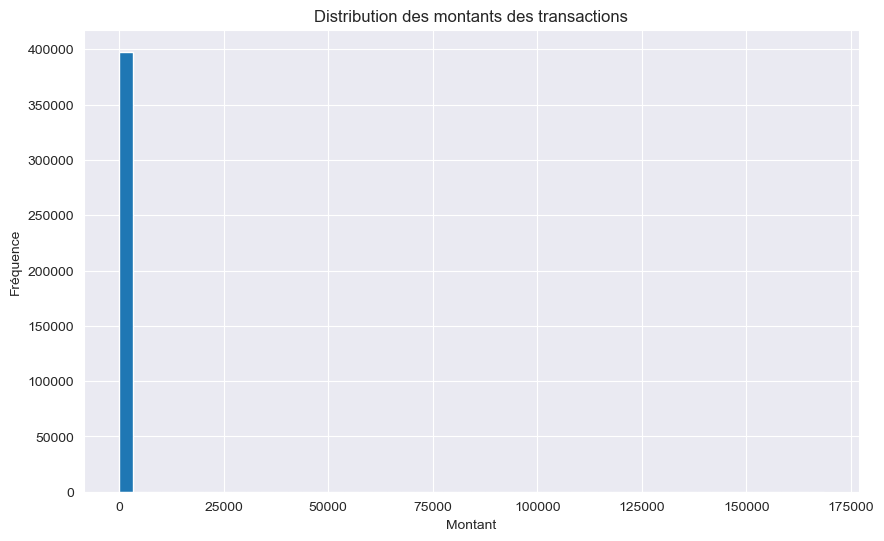

In [25]:
# Distribution des montants des transactions
plt.figure(figsize=(10, 6))
plt.hist(df_clean['TotalAmount'], bins=50)
plt.title('Distribution des montants des transactions')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()

In [26]:
df_clean['TotalAmount'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

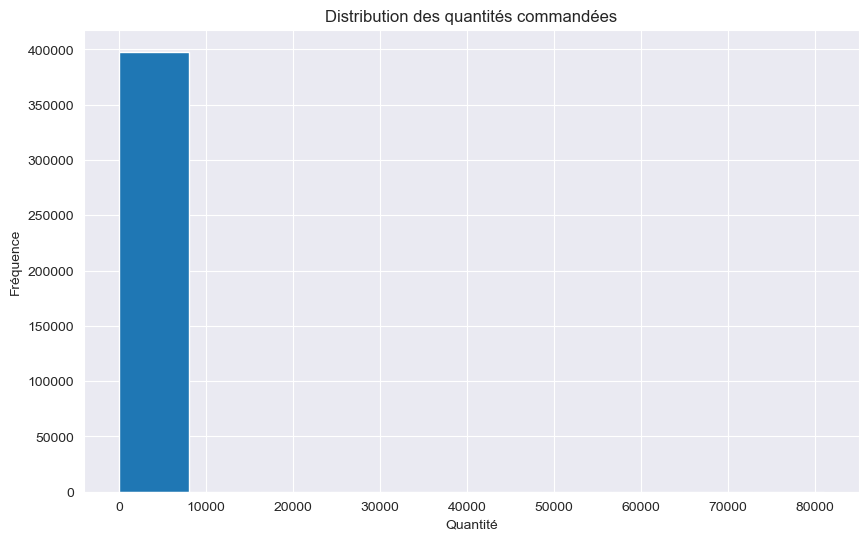

In [28]:
# Distribution des quantités commandées
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Quantity'],)
plt.title('Distribution des quantités commandées')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.show()

In [29]:
df_clean['Quantity'].describe()

count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [30]:
# Préparation des données pour le clustering
# Standardisation des variables RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Détermination du nombre optimal de clusters avec la méthode du coude
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

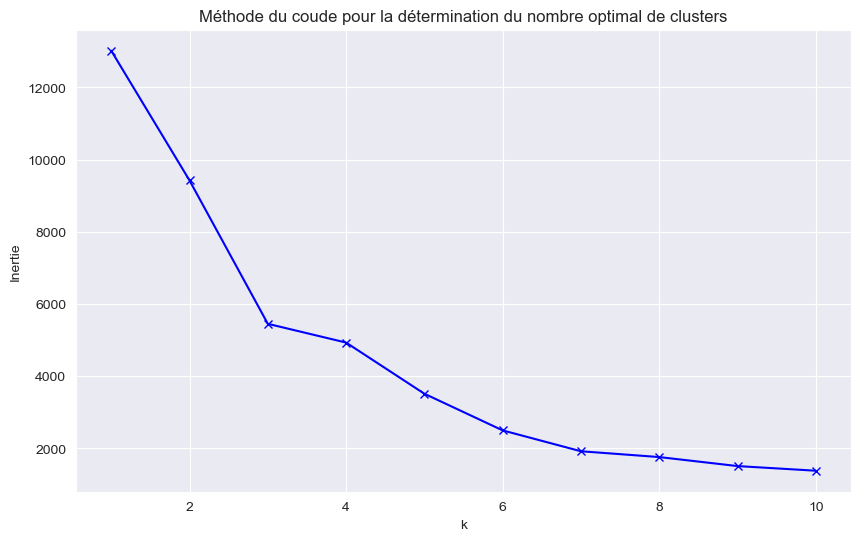

In [31]:
# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour la détermination du nombre optimal de clusters')
plt.show()

In [33]:
# Application du clustering avec le nombre optimal de clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyse des clusters
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print("\n=== ANALYSE DES CLUSTERS ===")
print(cluster_analysis)


=== ANALYSE DES CLUSTERS ===
         Recency  Frequency   Monetary
Cluster                               
0          40.38     103.09    2028.83
1         246.31      27.79     637.32
2           3.69    2565.31  126118.31


## Visualisation des clusters

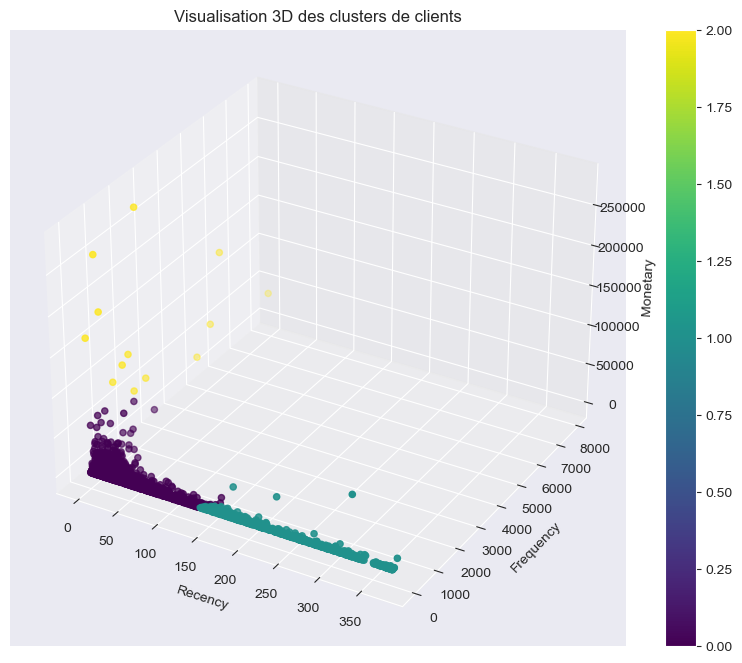

In [34]:
# Visualisation 3D des clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], 
                    rfm['Frequency'], 
                    rfm['Monetary'],
                    c=rfm['Cluster'],
                    cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.colorbar(scatter)
plt.title('Visualisation 3D des clusters de clients')
plt.show()

## Interpretation 3D des clusters de clients

In [36]:
print("\n=== INTERPRÉTATION DES CLUSTERS ===")
for cluster in range(3):
    cluster_size = (rfm['Cluster'] == cluster).sum()
    cluster_pct = cluster_size / len(rfm) * 100
    print(f"\nCluster {cluster}:")
    print(f"Nombre de clients: {cluster_size} ({cluster_pct:.1f}%)")
    print(f"Récence moyenne: {cluster_analysis.loc[cluster, 'Recency']:.1f} jours")
    print(f"Fréquence moyenne: {cluster_analysis.loc[cluster, 'Frequency']:.1f} commandes")
    print(f"Montant moyen: {cluster_analysis.loc[cluster, 'Monetary']:.2f} £")


=== INTERPRÉTATION DES CLUSTERS ===

Cluster 0:
Nombre de clients: 3245 (74.8%)
Récence moyenne: 40.4 jours
Fréquence moyenne: 103.1 commandes
Montant moyen: 2028.83 £

Cluster 1:
Nombre de clients: 1080 (24.9%)
Récence moyenne: 246.3 jours
Fréquence moyenne: 27.8 commandes
Montant moyen: 637.32 £

Cluster 2:
Nombre de clients: 13 (0.3%)
Récence moyenne: 3.7 jours
Fréquence moyenne: 2565.3 commandes
Montant moyen: 126118.31 £
